**<span style="color: #808080;">In The Name of God</span>**

---

**<span style="color: #808080;">Erfan Falahati</span>**

**<span style="color: #808080;">SID:</span> <span style="color: #808080;">810102491</span>**

# **<span style="color: #3399FF;">Computer Assignment #3: Machine Learning</span>**


In [114]:
DATASET_PATH = 'content/Grades.csv'
CLEANED_DATASET_PATH = 'content/cleaned_data.csv'

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier

df = pd.read_csv(DATASET_PATH)

# **<span style="color: #C0C0C0;">Data Exploration in Tableau</span>**

# **<span style="color: #C0C0C0;">Preprocessing and Feauture Engineering</span>**

## **<span style="color: #66B2FF;">Dataset Overview</span>** 

In [116]:
df.head(5)

,university,sex,age,address,motherEducation,fatherEducation,motherJob,fatherJob,reason,travelTime,...,internet,romantic,freeTime,goOut,Dalc,Walc,absences,EPSGrade,DSGrade,finalGrade
0,PR,F,18,U,4,4,at_home,teacher,course,2,...,no,no,3,4,1,1,6,5,6,6
1,PR,F,17,U,1,1,at_home,other,course,1,...,yes,no,3,3,1,1,4,5,5,6
2,PR,F,15,U,1,1,at_home,other,other,1,...,yes,no,3,2,2,3,10,7,8,10
3,PR,F,15,U,4,2,health,services,home,1,...,yes,yes,2,2,1,1,2,15,14,15
4,PR,F,16,U,3,3,other,other,home,1,...,no,no,3,2,1,2,4,6,10,10


In [117]:
df.describe()

,age,motherEducation,fatherEducation,travelTime,studyTime,failures,freeTime,goOut,Dalc,Walc,absences,EPSGrade,DSGrade,finalGrade
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.234257,3.108312,1.478589,2.289673,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.996476,1.112762,0.889143,1.286770,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,2.000000,3.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [118]:
from IPython.display import Markdown, display

display(Markdown("### 📁 Check for NaN values"))
display(df.isnull().sum().to_frame(name='Null Count').style.set_caption("Raw Bounding Box Info"))


### 📁 Check for NaN values

,Null Count
university,0
sex,0
age,0
address,0
motherEducation,0
fatherEducation,0
motherJob,0
fatherJob,0
reason,0
travelTime,0


## **<span style="color: #66B2FF;">Preprocess</span>** 

### **Handle the others values** 

In [119]:
df_v1 = df.copy()
other_ratio_mother_job = df_v1[df_v1['fatherJob'] == 'other']['fatherJob'].count() / df_v1.shape[0]
other_ratio_fatherjob = df_v1[df_v1['motherJob'] == 'other']['motherJob'].count() / df_v1.shape[0]
other_ration_reason = df_v1[df_v1['reason'] == 'other']['reason'].count() / df_v1.shape[0]


print("other counts for columns:")
print(f"motherJob others percentage: % {other_ratio_mother_job}")
print(f"fatherJob others percentage: % {other_ratio_fatherjob}")
print(f"reason others percentage: % {other_ration_reason}")


other counts for columns:
motherJob others percentage: % 0.5465994962216625
fatherJob others percentage: % 0.35768261964735515
reason others percentage: % 0.09319899244332494


In [120]:
df_v2 = df_v1.drop(columns=['fatherJob', 'motherJob'])

#### **Predict the reason** 

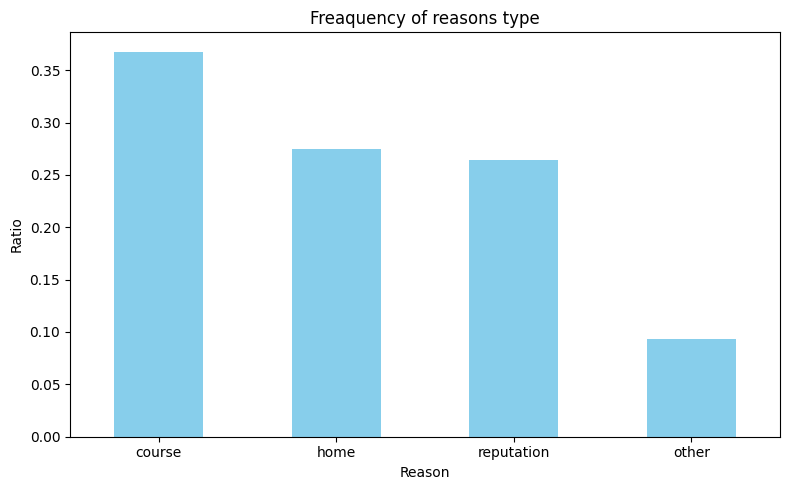

In [121]:
reasons_ratio = df_v2['reason'].value_counts() / df_v2.shape[0]

plt.figure(figsize=(8, 5))
reasons_ratio.plot(kind='bar', color='skyblue')

plt.title('Freaquency of reasons type')
plt.xlabel('Reason')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [122]:
near_home_other_ratio = df_v2[(df_v2['reason'] == 'other') & (df_v2['travelTime'] == 1)]['reason'].count() / df_v2[df_v2['reason'] == 'other'].shape[0]
print(f"reason others percentage: % {near_home_other_ratio}")

reason others percentage: % 0.6216216216216216


In [123]:
df_v2.loc[(df_v2['travelTime'] == 1) & (df['reason'] == 'other'), 'reason'] = 'home'
df_v2.loc[df_v2['reason'] == 'other', 'reason'] = 'course'

### **Categorical Conversion** 

In [124]:
def categorize_grade(grade):
    if grade > 17:
        return 'A'
    elif 14 <= grade <= 17:
        return 'B'
    elif 10 <= grade < 14:
        return 'C'
    else:
        return 'F'
    
df_v3 = df_v2.copy()
df_v3['finalGrade'] = df_v3['finalGrade'].apply(categorize_grade)

### **Final Data** 

In [125]:
final_df = df_v3.copy()
final_df.to_csv(CLEANED_DATASET_PATH)

# **<span style="color: #C0C0C0;">Models</span>**

In [126]:
df = pd.read_csv(CLEANED_DATASET_PATH)

## **<span style="color: #66B2FF;">Train-Test Split</span>** 

In [127]:
x = df.drop(columns=['finalGrade'])
y = df['finalGrade']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=520)

## **<span style="color: #66B2FF;">Normalization/Standardization</span>** 

### Log-transform

In [128]:
log_columns = ['DSGrade', 'EPSGrade']
x_train[log_columns] = np.log1p(x_train[log_columns])
x_test[log_columns] = np.log1p(x_test[log_columns])

### Standardization

In [129]:
numeric_cols = ['DSGrade', 'EPSGrade', 'age', 'absences', 'studyTime', 'freeTime', 'goOut', 'Dalc', 'Walc']
scaler = StandardScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

### Encode

In [130]:
le = LabelEncoder()
for col in ['university', 'sex', 'address', 'reason', 'paid', 'higher', 'internet', 'romantic', 'universitySupport']:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

In [131]:
def split(df, seed=491):
    x = df.drop(columns=['finalGrade'])
    y = df['finalGrade']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

    log_columns = ['DSGrade', 'EPSGrade']
    x_train[log_columns] = np.log1p(x_train[log_columns])
    x_test[log_columns] = np.log1p(x_test[log_columns])

    numeric_cols = ['DSGrade', 'EPSGrade', 'age', 'absences', 'studyTime', 'freeTime', 'goOut', 'Dalc', 'Walc']
    scaler = StandardScaler()
    x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
    x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])
    le = LabelEncoder()
    for col in ['university', 'sex', 'address', 'reason', 'paid', 'higher', 'internet', 'romantic', 'universitySupport']:
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.transform(x_test[col])

    return x_train, x_test, y_train, y_test


## **<span style="color: #66B2FF;">Sklearn Models</span>** 

### Naive Bayes

In [132]:
x_train, x_test, y_train, y_test = split(df, seed=520)

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy: %{accuracy_score(y_test, y_pred) * 100}")
print(classification_report(y_test, y_pred))


[[ 2  1  0  0]
 [ 0 20  0  1]
 [ 0  4 23  5]
 [ 0  0  3 21]]
Accuracy: %82.5
              precision    recall  f1-score   support

           A       1.00      0.67      0.80         3
           B       0.80      0.95      0.87        21
           C       0.88      0.72      0.79        32
           F       0.78      0.88      0.82        24

    accuracy                           0.82        80
   macro avg       0.87      0.80      0.82        80
weighted avg       0.83      0.82      0.82        80



### Decision Tree

In [ ]:
x_train, x_test, y_train, y_test = split(df, seed=None)

params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=491, criterion='entropy'), params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)



best_model = grid_search.best_estimator_
y2_pred = best_model.predict(x_test)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=x.columns, class_names=best_model.classes_, filled=True)
plt.show()

importances = best_model.feature_importances_
for feature, importance in sorted(zip(x.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.3f}")

AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

### Random Forest

In [ ]:
x_train, x_test, y_train, y_test = split(df, seed=491)


param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced',random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
)

random_search.fit(x_train, y_train)

best_rf = random_search.best_estimator_

y_pred = best_rf.predict(x_test)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Accuracy: 0.8125
              precision    recall  f1-score   support

           A       0.50      0.50      0.50         2
           B       0.94      0.79      0.86        19
           C       0.73      0.81      0.77        27
           F       0.84      0.84      0.84        32

    accuracy                           0.81        80
   macro avg       0.75      0.74      0.74        80
weighted avg       0.82      0.81      0.81        80



### XGBoost

In [ ]:
# x_train, x_test, y_train, y_test = split(df, seed=491)
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.fit_transform(y_test)

# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5], 
#     'min_split_loss': [0, 1],       
#     'subsample': [0.8],             
#     'colsample_bytree': [0.6, 0.8, 1.0], 
# }

# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,
#     verbose=1,
#     n_jobs=-1
# )

# grid_search.fit(x_train, y_train)

# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(x_test)

# print("Best Parameters:", grid_search.best_params_)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/home/erfan/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:28:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/erfan/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:28:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/erfan/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:28:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/erfan/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:28:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/erfan/.local/lib/python3.12/site-packages/xgboost/training.py:

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'min_split_loss': 1, 'n_estimators': 50, 'subsample': 0.8}
Accuracy: 0.8375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.84      0.91        19
           2       0.73      0.81      0.77        27
           3       0.84      0.84      0.84        32

    accuracy                           0.84        80
   macro avg       0.89      0.88      0.88        80
weighted avg       0.85      0.84      0.84        80



## **<span style="color: #66B2FF;">Decision Tree from Scratch</span>** 

In [ ]:
from DT_Core import DecisionTreeScratch

x_train, x_test, y_train, y_test = split(df, seed=127)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

model = DecisionTreeScratch(
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=2,
    )
model.fit(x_train, y_train)

y_pred = model.predict(x_test.values)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.94      0.94      0.94        18
           2       0.84      0.87      0.86        31
           3       0.88      0.85      0.86        26

    accuracy                           0.89        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.89      0.89      0.89        80



## **<span style="color: #66B2FF;">Comparison with Library Implementation</span>** 

# **<span style="color: #C0C0C0;">Performance Measures</span>**

$$
precision = \frac{TP}{TP + FP}
$$
$$
recall = \frac{TP}{TP + FN}
$$
$$
F1 = 2 * \frac{precision * recall}{precision + recall}
$$